In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import plotly
from scipy import stats

In [2]:
# Parameters of interest
SIGMA = np.array([[5,-2],[-2,8]])
MIU = [50,3]
N = 10_000
A = 0.5
B = 3

# Normal Variance Mixture Model
### With Positive Uniform Mixing Variable
The following function simulates a multivariate normal variance mixture distribution and returns a sample.
The function simulates a specific class of multivariate normal variance models that assumes:
     $X = miu + wAZ,$  
 where:
* miu is the mean vector
* A is the cholesky decomposition of the scaling matrix sigma (covariance matrix of desired normal distribution)
* Z is a random vector of a multivariate normal distribution with mean =(0,0,..,0)' and covariance = I
* w is uniformly distributed random variable
* Normal variance mixture models use a component w that is distributed according to a desired distribution and thus
  not necessarily uniformly distributed as in function bellow 

In [3]:

def normal_variance_mixture(miu, sigma, n, a,b):
    Z =  stats.multivariate_normal.rvs(cov = np.identity(len(sigma)), size = n)  #nx2 matrix
    W = np.sqrt(stats.uniform.rvs(loc=0.5,scale=3, size = n))
    
    for i in range(n):
        Z[i,:] = Z[i,:]*W[i]
        
    A = np.linalg.cholesky(sigma)    #Cholesky Decomposition of sigma Matrix
    X = np.array(miu) + np.matmul(A, Z.transpose()).transpose()   # X = miu + wAZ0 (normal variance mixture)
    return X 



In [4]:
X = normal_variance_mixture(miu= MIU, sigma= SIGMA, n= N, a= A,b= B)


## Multivariate Normal vs Multivariate Normal Variance Mixture 
### with uniform mixing variable

In [5]:
X1 = stats.multivariate_normal.rvs(MIU, cov = SIGMA, size = N)
print( 'Multivariate Normal variance mixure: \n \n', stats.mstats.describe(X), '\n')
print('Multivariate Normal \n \n', stats.mstats.describe(X1),'\n')

Multivariate Normal variance mixure: 
 
 DescribeResult(nobs=array([10000, 10000]), minmax=(masked_array(data=[ 37.88147681, -15.36284952],
             mask=False,
       fill_value=1e+20), masked_array(data=[64.2366873 , 18.60111823],
             mask=False,
       fill_value=1e+20)), mean=masked_array(data=[49.99409338,  2.97782254],
             mask=False,
       fill_value=1e+20), variance=masked_array(data=[ 9.75242388, 15.95539254],
             mask=False,
       fill_value=1e+20), skewness=masked_array(data=[-0.00667765, -0.02988127],
             mask=False,
       fill_value=1e+20), kurtosis=masked_array(data=[0.47006704, 0.40389964],
             mask=False,
       fill_value=1e+20)) 

Multivariate Normal 
 
 DescribeResult(nobs=array([10000, 10000]), minmax=(masked_array(data=[42.4570513 , -8.86048604],
             mask=False,
       fill_value=1e+20), masked_array(data=[58.39573853, 13.42599468],
             mask=False,
       fill_value=1e+20)), mean=masked_array(dat

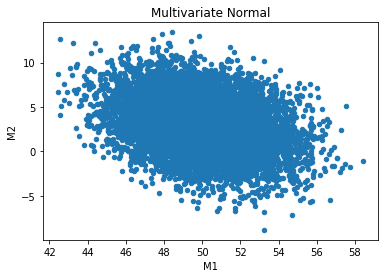

In [6]:
# bivariate normal scatter plot

X1 = pd.DataFrame(X1)
X1.plot.scatter([0,],[1,], title = 'Multivariate Normal', xlabel = 'M1', ylabel = 'M2')
plt.show()

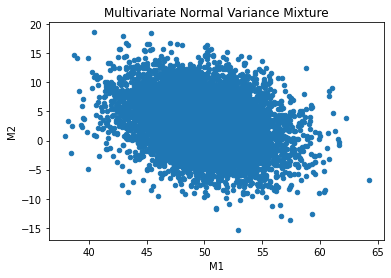

In [7]:
# bivariate normal variance mixture scatter plot
X = pd.DataFrame(X)
X.plot.scatter([0,], [1,], title = 'Multivariate Normal Variance Mixture', xlabel = 'M1', ylabel = 'M2')
plt.show()

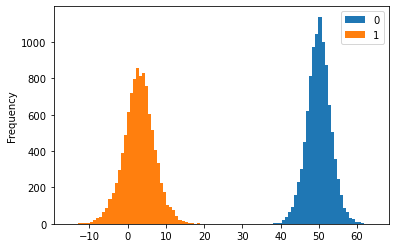

In [8]:
# Histogram of the margins of mixture distribution
X.plot.hist(0, bins = 100 )
plt.show()

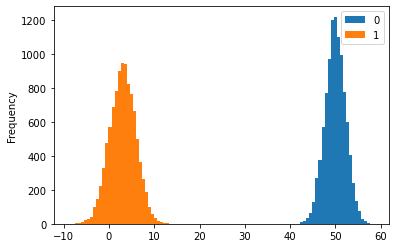

In [9]:
# Histogram of the margins of the bivariate normal distribution
X1.plot.hist(0, bins = 100)
plt.show()

In [10]:
# Marginal Skew and Excess Kurtosis of multivariate normal sample
print('skew(X1) = ',stats.skew(X1))
print('excess kurtosis(X1) = ', stats.kurtosis(X1))

skew(X1) =  [ 0.00197578 -0.01695767]
excess kurtosis(X1) =  [-0.03036455  0.0067852 ]


In [11]:
# Marginal Skew and Excess Kurtosis of  normal variance mixture sample
print('skew(X) = ', stats.skew(X))
print('excess kurtosis(X) = ', stats.kurtosis(X))

skew(X) =  [-0.00667765 -0.02988127]
excess kurtosis(X) =  [0.47006704 0.40389964]


### Comparison Results
The scatter plot and histograms seem to show that the mixture model has a higher kurtosis.
This is further confirmed by measuring the empirical kurtosis on the margins, noticing that the normal variance mixture's margins have significantly positive excess kurtosis.